In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Superstore.csv', encoding='latin1')

# Preview the dataset
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
# View data types and non-null counts
df.info()

# View summary statistics
df.describe(include='all')

# Show column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
# Check for missing values
df.isnull().sum()

# Check for duplicated rows
df.duplicated().sum()


0

In [26]:
df.columns = df.columns.str.strip()


In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Drop rows where date conversion failed (if any)
df = df.dropna(subset=['Order Date', 'Ship Date'])


In [30]:
# Check unique values
print("Regions:", df['Region'].unique())
print("Categories:", df['Category'].unique())

# Check for negative values
print("Negative Sales:", df[df['Sales'] < 0])
print("Negative Quantity:", df[df['Quantity'] < 0])


Regions: ['South' 'West' 'Central' 'East']
Categories: ['Furniture' 'Office Supplies' 'Technology']
Negative Sales: Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]
Negative Quantity: Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


In [32]:
# Total sales and profit
print("Total Sales: £", round(df['Sales'].sum(), 2))
print("Total Profit: £", round(df['Profit'].sum(), 2))


Total Sales: £ 2297200.86
Total Profit: £ 286397.02


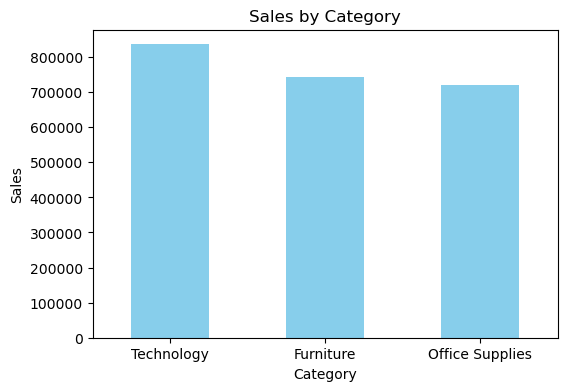

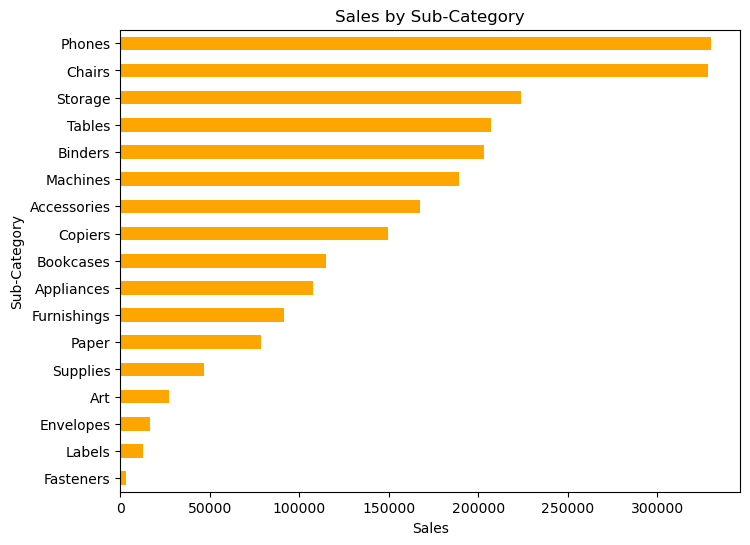

In [34]:
# Sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Sales by Category', figsize=(6,4), color='skyblue')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

# Sales by sub-category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values()
subcat_sales.plot(kind='barh', title='Sales by Sub-Category', figsize=(8,6), color='orange')
plt.xlabel('Sales')
plt.show()


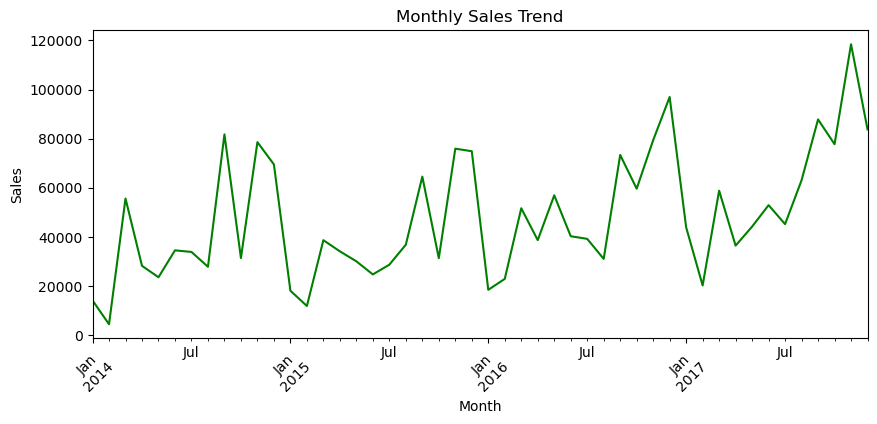

In [36]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()

monthly_sales.plot(title='Monthly Sales Trend', figsize=(10,4), color='green')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


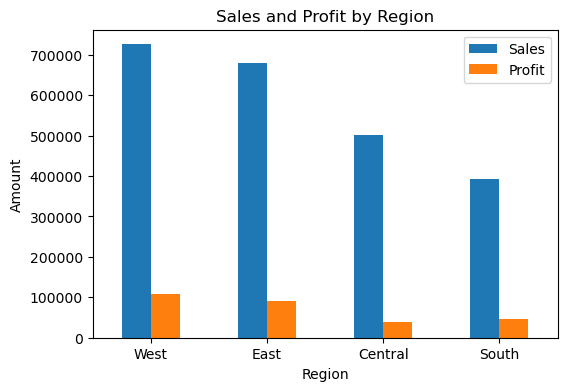

In [38]:
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
region_summary.plot(kind='bar', title='Sales and Profit by Region', figsize=(6,4))
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()


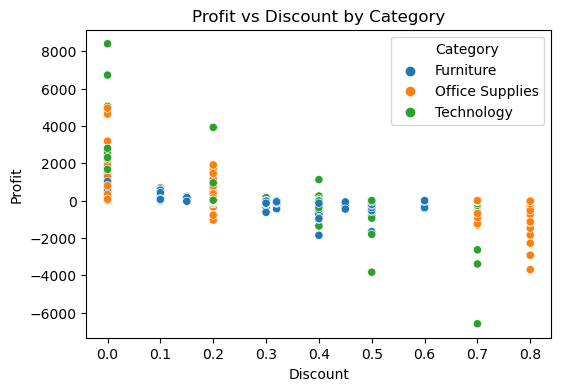

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Profit vs Discount by Category')
plt.show()


In [42]:
region_summary.to_csv('Region_Sales_Profit.csv')
monthly_sales.to_csv('Monthly_Sales.csv')

In [44]:
df.to_csv("Cleaned_Superstore.csv", index=False)
